In [19]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
df_train = pd.read_csv("/data/MNIST/mnist_train.csv", header=None)
df_test = pd.read_csv("/data/MNIST/mnist_test.csv", header=None)

In [12]:
df_train.shape, df_test.shape

((60000, 785), (10000, 785))

In [27]:
X_train = df_train.iloc[:,1:].values
X_test = df_test.iloc[:,1:].values
y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

In [28]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 784), (10000, 784), (60000,), (10000,))

In [13]:
28 * 28

784

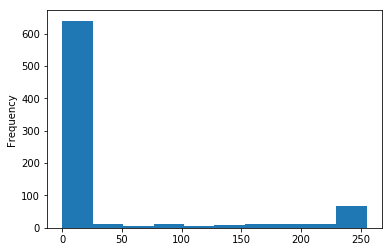

In [14]:
df_train.iloc[0,:].plot.hist()

In [15]:
df_train.iloc[0,:].describe()

count    785.000000
mean      35.070064
std       79.656078
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max      255.000000
Name: 0, dtype: float64

Text(0.5, 1.0, '5')

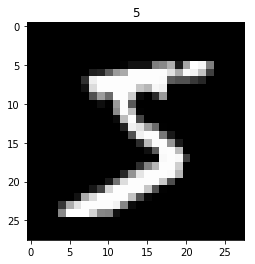

In [22]:
plt.imshow(df_train.iloc[0,1:].values.reshape((28,28)), cmap="gray")
plt.title(df_train.iloc[0,0])

In [30]:
X_train.flatten().shape

(47040000,)

In [31]:
a = X_train.flatten()
(a == 0).sum()/len(a)

0.8087977040816327

In [32]:
X_train = X_train/255

In [33]:
a = X_train.flatten()
(a == 0).sum()/len(a)

0.8087977040816327

In [34]:
X_train = df_train.iloc[:,1:].values/255
X_test = df_test.iloc[:,1:].values/255
y_train = df_train.iloc[:,0].values
y_test = df_test.iloc[:,0].values

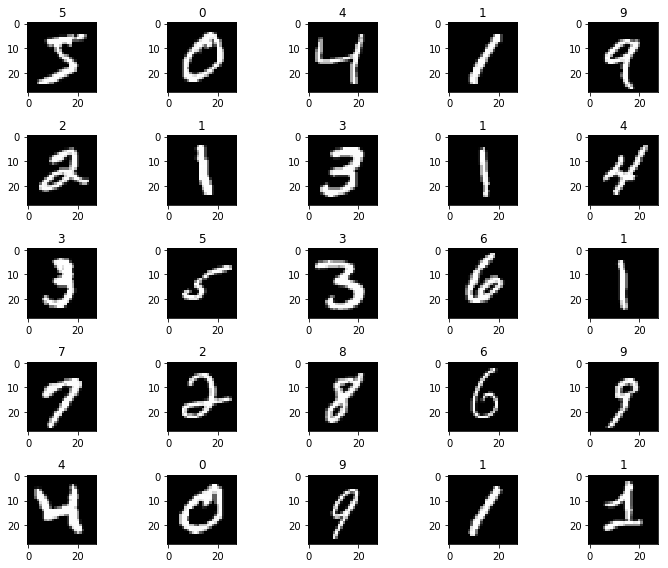

In [37]:
fig, axes = plt.subplots(5, 5, figsize = (10,8))

for i, ax in enumerate(fig.axes):
    ax.imshow(X_train[i].reshape((28,28)), cmap = "gray")
    ax.set_title(y_train[i])

plt.tight_layout()

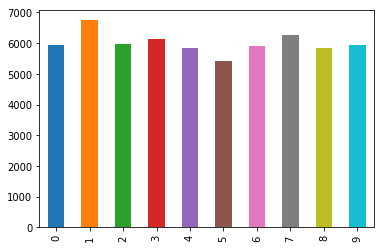

In [39]:
pd.Series(y_train).value_counts().sort_index().plot.bar()

In [40]:
from sklearn import *

In [59]:
%%time

est = linear_model.SGDClassifier(loss="log", eta0=0.01, random_state = 1
        , alpha=0.01, learning_rate="invscaling", tol = 1e-4
        , max_iter = 1000)

est.fit(X_train, y_train)
print("test accuracy", est.score(X_test, y_test))

test accuracy 0.8861
CPU times: user 1min 24s, sys: 187 ms, total: 1min 24s
Wall time: 1min 24s


In [60]:
y_test_pred = est.predict(X_test)

In [61]:
error = y_test != y_test_pred

In [62]:
summary = pd.DataFrame({"actual": y_test
                      , "prediction": y_test_pred, "error": error})

summary.sample(10)

,actual,prediction,error
9094,9,9,False
3763,5,4,True
1333,0,0,False
5925,3,3,False
9347,4,4,False
8644,6,6,False
3755,9,9,False
5475,2,2,False
9052,0,0,False
4682,9,9,False


In [63]:
import seaborn as sns

Text(0.5, 1.0, 'Number of misclassification by class')

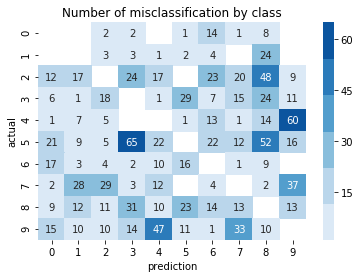

In [65]:
a = summary[error]
a = a.pivot_table("error", "actual", "prediction", aggfunc = "sum")
sns.heatmap(a, cmap = sns.color_palette("Blues"), annot=True)
plt.title("Number of misclassification by class")

In [67]:
est.coef_.shape

(10, 784)

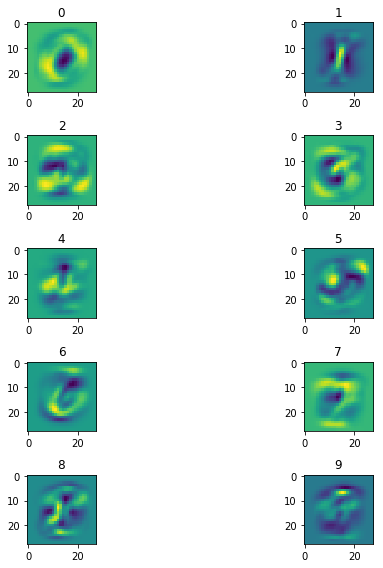

In [71]:
fig, axes = plt.subplots(5, 2, figsize = (10,8))

for i, ax in enumerate(fig.axes):
    ax.imshow(est.coef_[i].reshape((28,28)))
    ax.set_title(i)

plt.tight_layout()

In [73]:
pd.DataFrame(est.coef_[0].reshape((28,28)))

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000e+00,0.000000e+00,0.000000,0.000000,-0.000002,-0.000006,-0.000030,-0.000074,-0.000149,-0.000276,...,-0.000467,-0.000332,-0.000255,-0.000088,-0.000028,-0.000004,0.000000,0.000000,0.000000,0.000000
2,0.000000e+00,0.000000e+00,-0.000002,0.000015,-0.000013,-0.000041,-0.000401,-0.000719,-0.001597,-0.003778,...,-0.020266,-0.015475,-0.009807,-0.004846,-0.002455,-0.001040,-0.000277,-0.000023,0.000000,0.000000
3,0.000000e+00,0.000000e+00,-0.000005,-0.000031,-0.000148,-0.000788,-0.002043,-0.003915,-0.006820,-0.013584,...,-0.058382,-0.044163,-0.029120,-0.017779,-0.009691,-0.003897,-0.001303,-0.000270,-0.000039,0.000000
4,0.000000e+00,-4.217301e-07,-0.000016,-0.000026,-0.000665,-0.003159,-0.007100,-0.013561,-0.023162,-0.034876,...,-0.031016,-0.028690,-0.027880,-0.025286,-0.020055,-0.013349,-0.006969,-0.001942,-0.000297,-0.000010
5,0.000000e+00,0.000000e+00,-0.000080,-0.000236,-0.002226,-0.007884,-0.016351,-0.031659,-0.049698,-0.063347,...,0.018423,-0.000159,-0.022751,-0.030572,-0.032532,-0.031043,-0.020668,-0.007691,-0.001633,-0.000121
6,0.000000e+00,-4.527930e-07,-0.000139,-0.001113,-0.005289,-0.013132,-0.026960,-0.046467,-0.067090,-0.077784,...,0.064184,0.034014,0.001294,-0.017613,-0.029840,-0.040612,-0.036429,-0.017073,-0.004200,-0.000457
7,-4.987175e-07,-8.004748e-05,-0.000867,-0.003113,-0.011013,-0.022080,-0.039504,-0.060819,-0.073535,-0.065135,...,0.090044,0.057088,0.021211,-0.007619,-0.020531,-0.036242,-0.042683,-0.023844,-0.005439,-0.000140
8,1.063470e-04,-2.336073e-04,-0.002448,-0.008646,-0.021147,-0.035681,-0.052197,-0.067974,-0.070384,-0.060534,...,0.079205,0.068024,0.043483,0.014280,0.003243,-0.012326,-0.034324,-0.024398,-0.004969,-0.000275
9,-1.981294e-05,-4.889908e-04,-0.003966,-0.012686,-0.027143,-0.043297,-0.055920,-0.063137,-0.062371,-0.052165,...,0.057260,0.076773,0.066388,0.047710,0.042068,0.024738,-0.013462,-0.017500,-0.003979,-0.000251


In [79]:
Y_train = keras.utils.to_categorical(y_train)
Y_test = keras.utils.to_categorical(y_test)

In [74]:
import keras

Using TensorFlow backend.


In [81]:
model = keras.Sequential()

model.add(keras.layers.InputLayer(input_shape=(784,)))
model.add(keras.layers.Dense(400, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.compile("adam"
              , loss = keras.losses.categorical_crossentropy
              , metrics = ["accuracy"])

model.fit(X_train
          , Y_train
          , epochs=10
          , validation_data=(X_test, Y_test)
          , batch_size=128)

model.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 53us/step - loss: 0.2550 - acc: 0.9269 - val_loss: 0.1313 - val_acc: 0.9606
Epoch 2/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0960 - acc: 0.9706 - val_loss: 0.0878 - val_acc: 0.9734
Epoch 3/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0612 - acc: 0.9812 - val_loss: 0.0765 - val_acc: 0.9761
Epoch 4/10
60000/60000 [==============================] - 3s 50us/step - loss: 0.0426 - acc: 0.9872 - val_loss: 0.0786 - val_acc: 0.9761
Epoch 5/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0330 - acc: 0.9896 - val_loss: 0.0910 - val_acc: 0.9712
Epoch 6/10
60000/60000 [==============================] - 3s 49us/step - loss: 0.0239 - acc: 0.9926 - val_loss: 0.0745 - val_acc: 0.9773
Epoch 7/10
60000/60000 [==============================] - 3s 48us/step - loss: 0.0199 - acc: 0.9938 - val_loss: 0.0746 - val_acc